In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\rithi\Desktop\DS_PRO\Own Pro\Red_wine _quality predection\wine_quality_prediction\research\WineQT.csv")

In [3]:
data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [6]:
data.shape

(1143, 13)

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

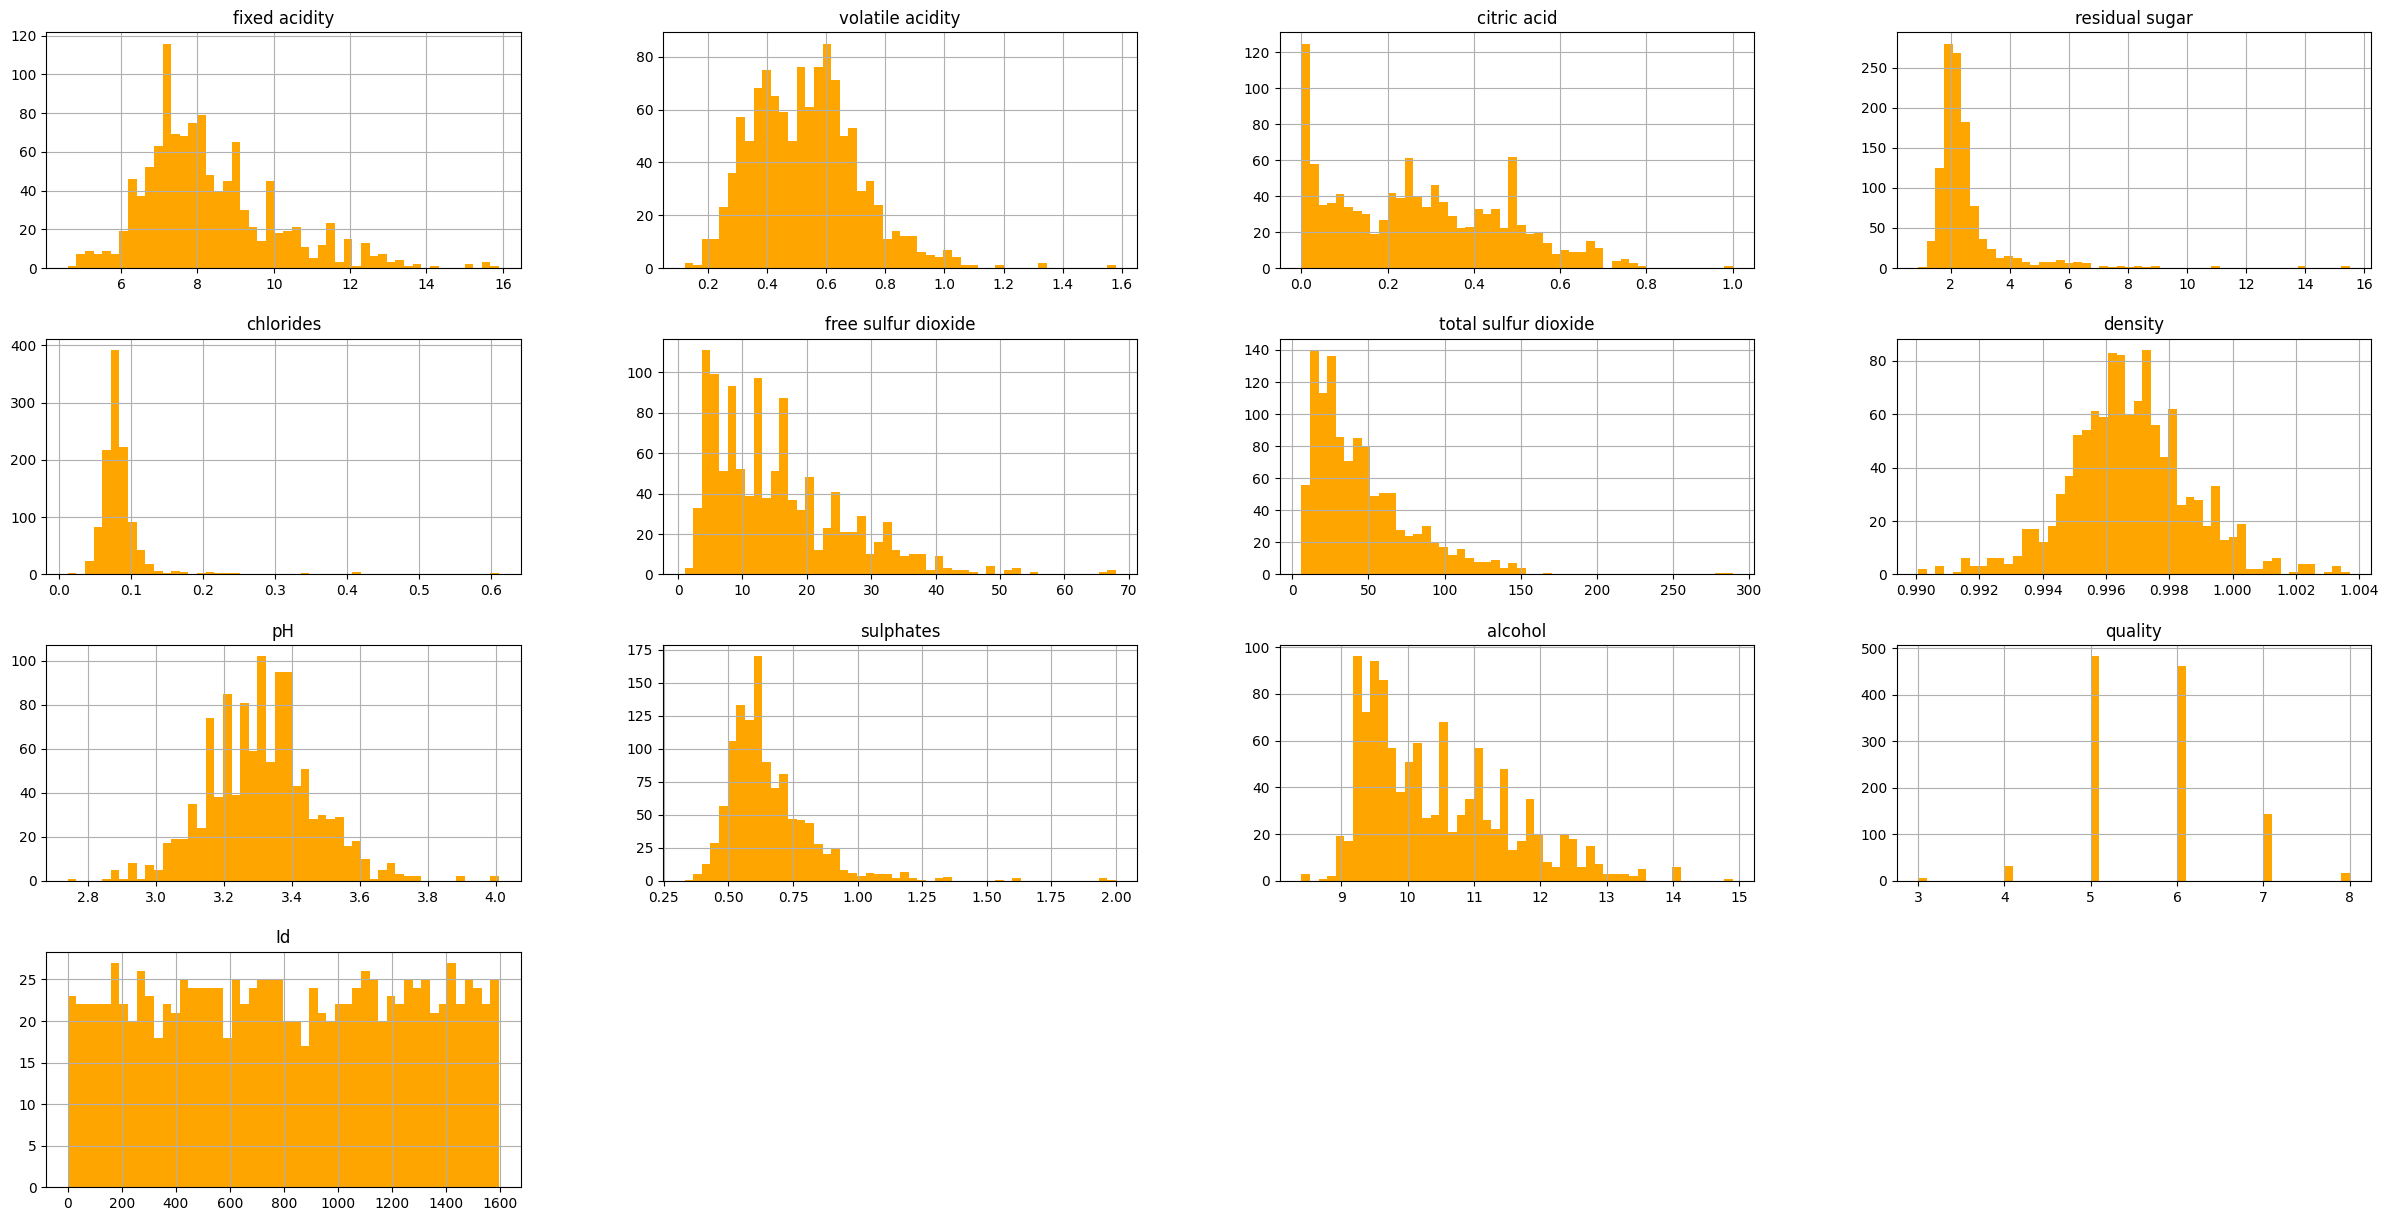

In [8]:
# how my data is distributed over here

import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(30,15), color = "orange")
plt.show()

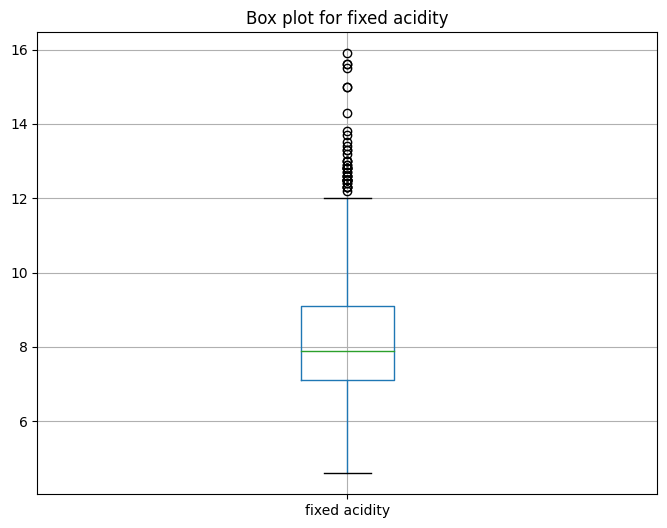

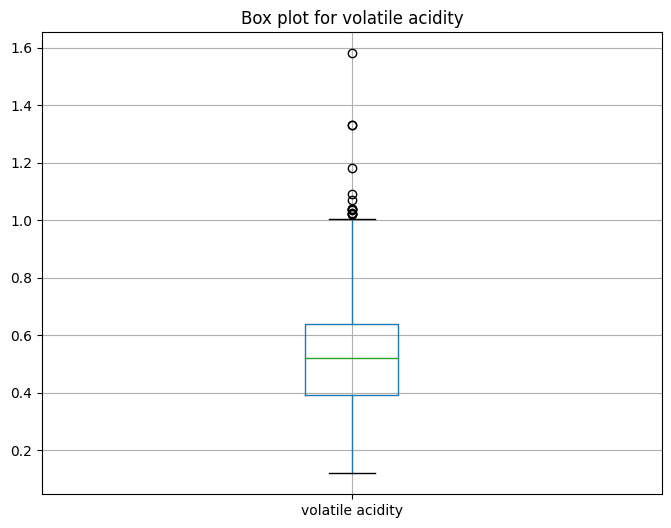

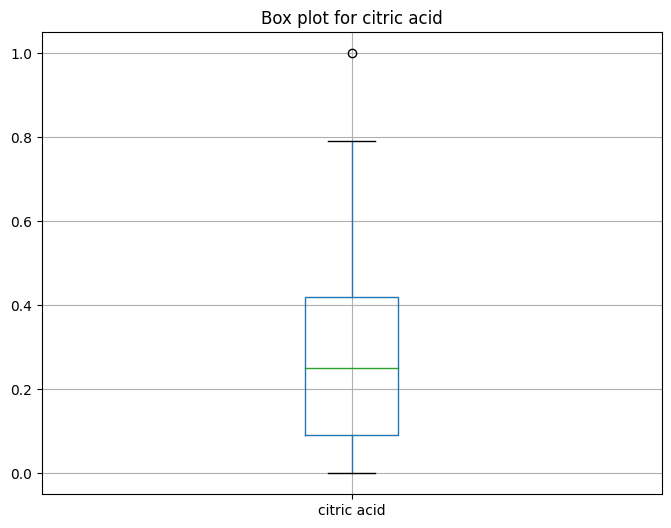

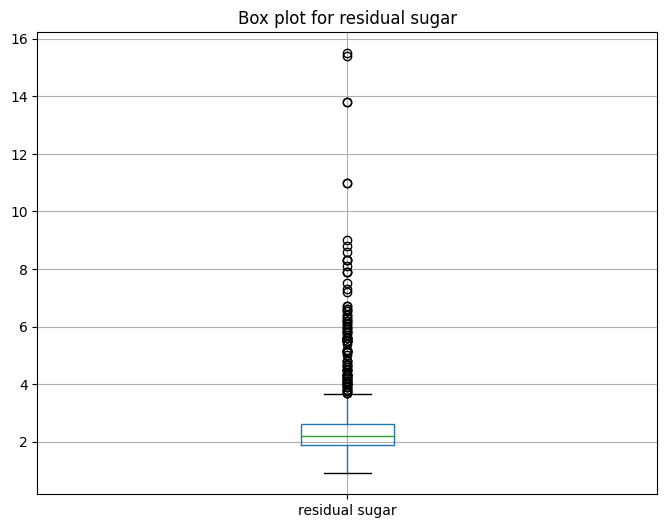

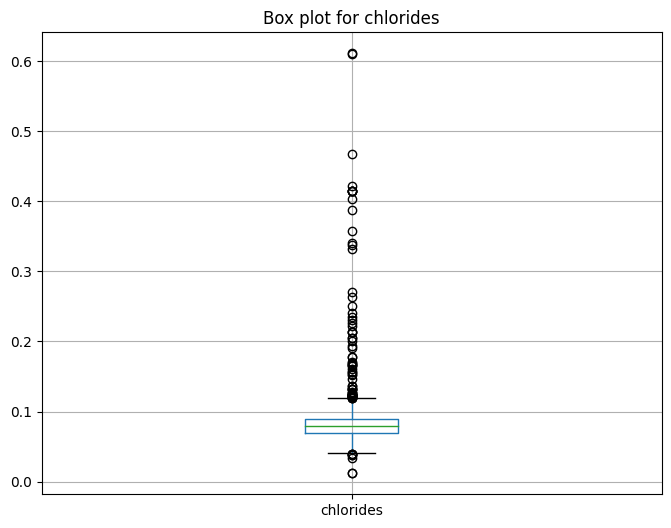

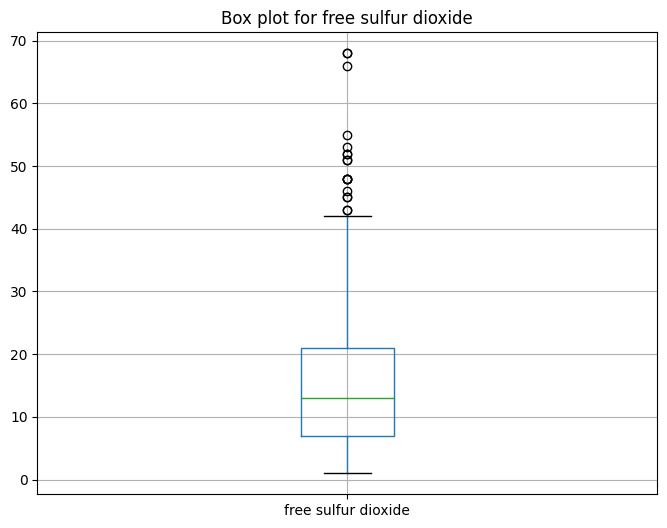

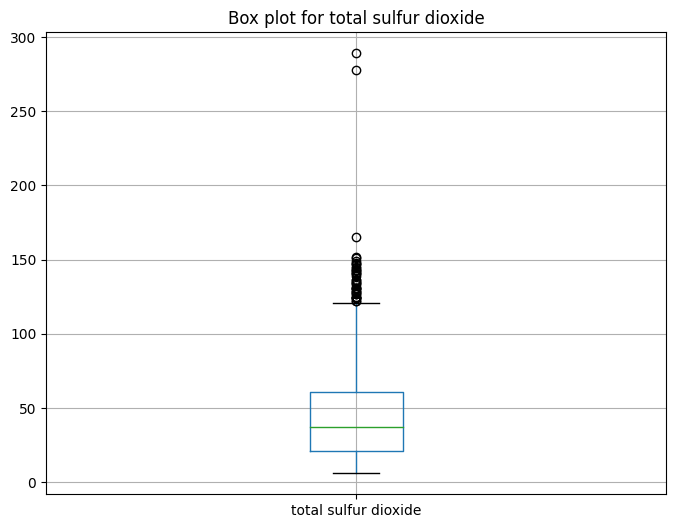

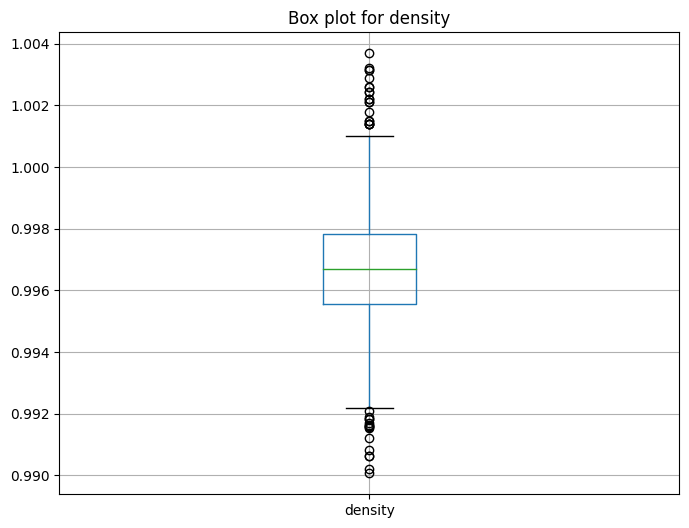

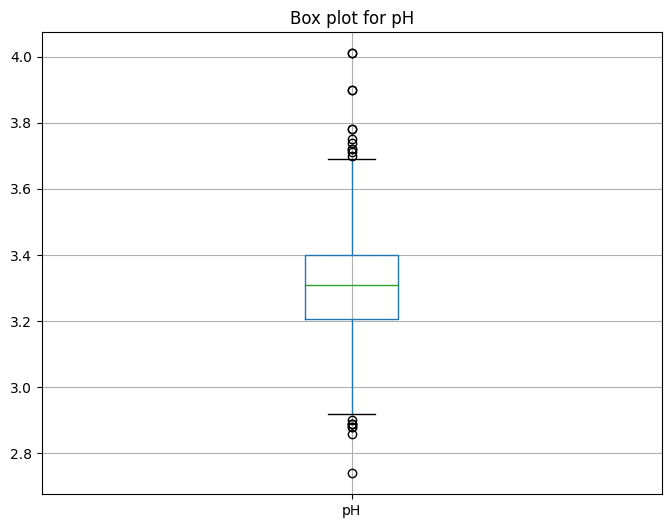

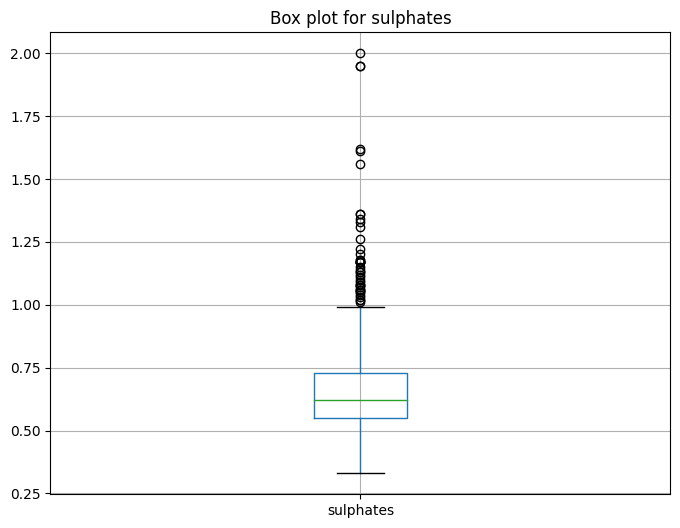

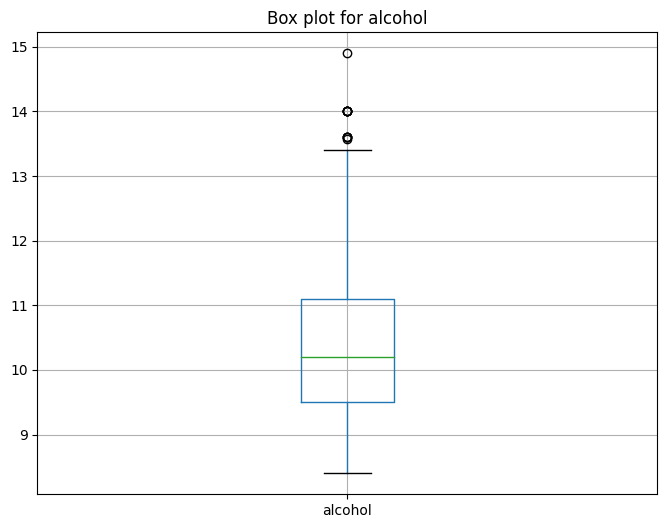

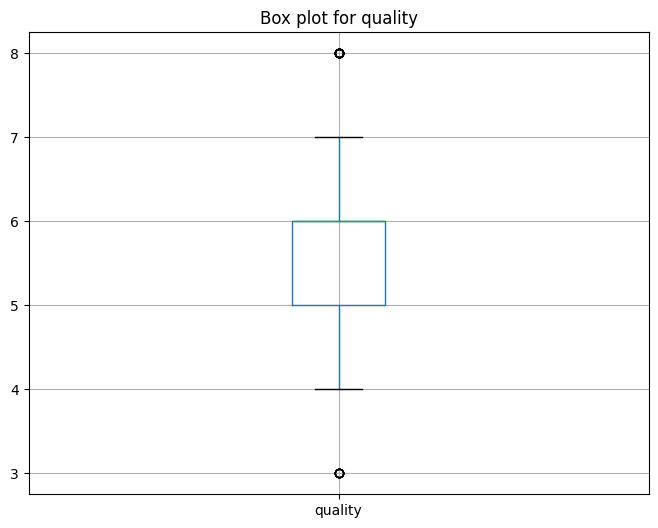

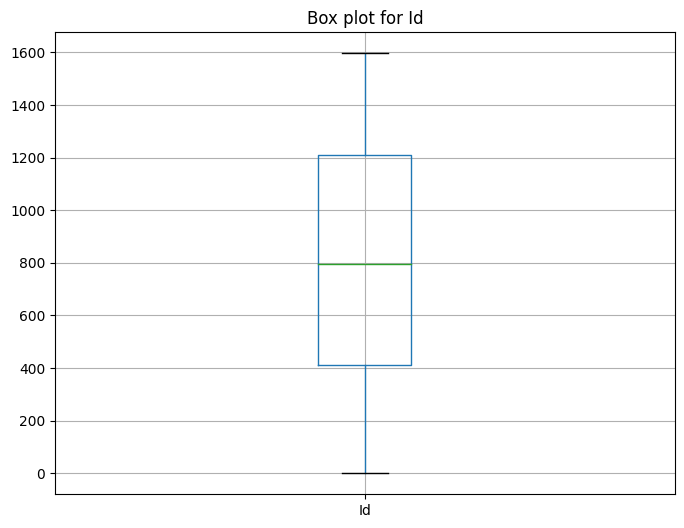

In [9]:
# Plot box plots for each column
for col in data.columns:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.show()

In [10]:
# # Identify outliers

# lower_percentile = 0.07
# upper_percentile = 0.85

# lower_bounds = data.quantile(lower_percentile)
# upper_bounds = data.quantile(upper_percentile)


# outliers = (data < lower_bounds) | (data > upper_bounds)

# # Remove outliers
# cleaned_df = data[~outliers.any(axis=1)]

# print("Original DataFrame:")
# print(data.shape)
# print("\nCleaned DataFrame (outliers removed):")
# print(cleaned_df.shape)

In [11]:
# # Plot box plots for each column
# for col in cleaned_df.columns:
#     plt.figure(figsize=(8, 6))
#     cleaned_df.boxplot(column=[col])
#     plt.title(f'Box plot for {col}')
#     plt.show()

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [13]:
from sklearn.model_selection import train_test_split


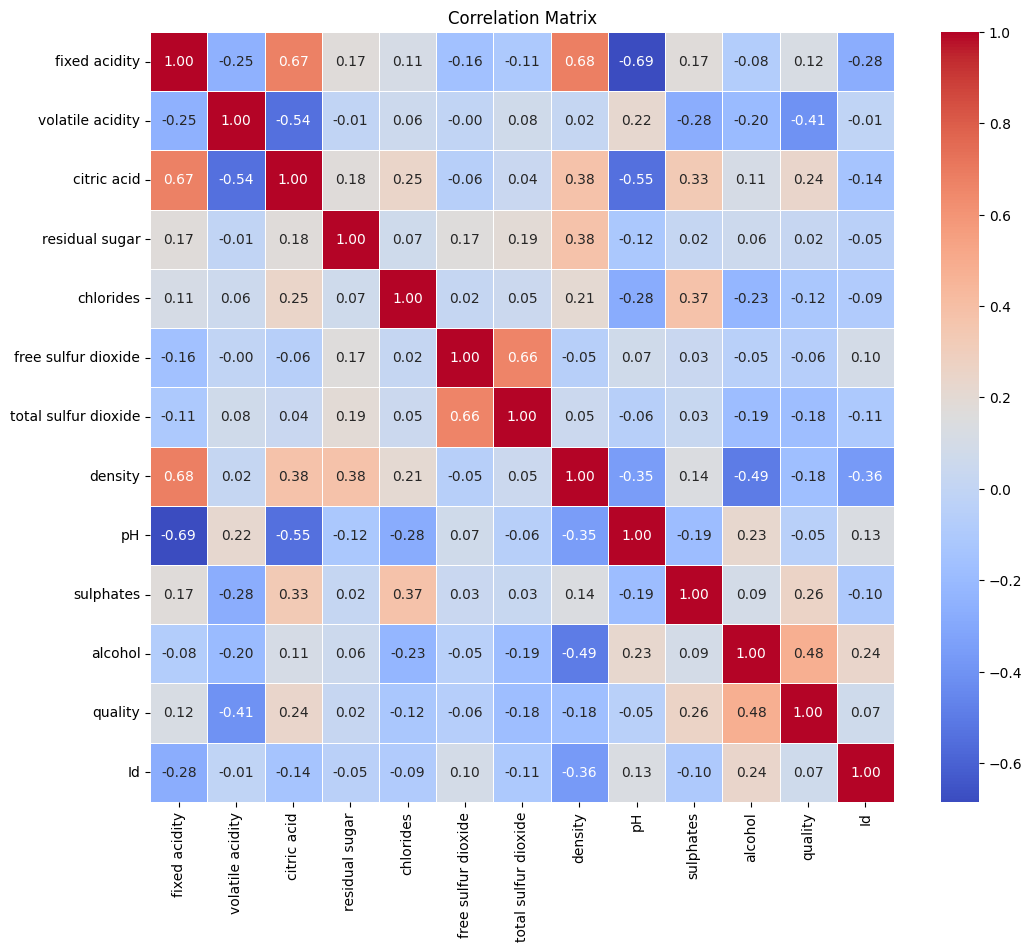

In [14]:
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
correlation_matrix = data.corr()

# Set your desired thresholds for positive and negative correlation
positive_threshold = 0.5
negative_threshold = -0.5

# Identify positively and negatively correlated columns
positive_correlation_columns = correlation_matrix.columns[(correlation_matrix.abs() > positive_threshold).any()]
negative_correlation_columns = correlation_matrix.columns[(correlation_matrix.abs() < negative_threshold).any()]

# Filter out columns with negative correlation and merge with columns with positive correlation
selected_columns = pd.Index(set(positive_correlation_columns) | set(negative_correlation_columns))

# Select only the identified columns from the DataFrame
df_filtered = data[selected_columns]

# Display the new DataFrame after dropping less correlated columns
print("DataFrame after dropping less correlated columns:")
print(df_filtered)

DataFrame after dropping less correlated columns:
      volatile acidity    pH  density  residual sugar  total sulfur dioxide  \
0                0.700  3.51  0.99780             1.9                  34.0   
1                0.880  3.20  0.99680             2.6                  67.0   
2                0.760  3.26  0.99700             2.3                  54.0   
3                0.280  3.16  0.99800             1.9                  60.0   
4                0.700  3.51  0.99780             1.9                  34.0   
...                ...   ...      ...             ...                   ...   
1138             0.510  3.42  0.99574             2.3                  40.0   
1139             0.620  3.42  0.99651             1.9                  38.0   
1140             0.600  3.45  0.99490             2.0                  44.0   
1141             0.550  3.52  0.99512             2.2                  51.0   
1142             0.645  3.57  0.99547             2.0                  44.0   

 

In [17]:
df_filtered.head(5)

,volatile acidity,pH,density,residual sugar,total sulfur dioxide,sulphates,Id,citric acid,alcohol,free sulfur dioxide,quality,chlorides,fixed acidity
0,0.70,3.51,0.9978,1.9,34.0,0.56,0,0.00,9.4,11.0,5,0.076,7.4
1,0.88,3.20,0.9968,2.6,67.0,0.68,1,0.00,9.8,25.0,5,0.098,7.8
2,0.76,3.26,0.9970,2.3,54.0,0.65,2,0.04,9.8,15.0,5,0.092,7.8
3,0.28,3.16,0.9980,1.9,60.0,0.58,3,0.56,9.8,17.0,6,0.075,11.2
4,0.70,3.51,0.9978,1.9,34.0,0.56,4,0.00,9.4,11.0,5,0.076,7.4


In [19]:
X = df_filtered.drop(['quality','Id'],  axis=1 )
y = df_filtered['quality']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=50)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 11)
(229, 11)
(914,)
(229,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [45]:
alpha = 0.001  # Regularization strength
l1_ratio = 0.4  # Mixing parameter, 0 <= l1_ratio <= 1
enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=50)
enet.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.4, random_state=50)

In [46]:
# Make predictions
y_pred = enet.predict(X_test_scaled)
print(y_pred)

[5.40360505 6.28964406 5.39787562 5.27890813 4.429235   6.01796168
 5.11031167 5.03074829 5.92229554 5.05932049 6.05156335 5.68286995
 5.85638931 5.38290645 5.25041494 5.74865147 6.37785166 5.15651582
 5.60988087 5.98013931 5.58728388 5.37715488 5.02714931 5.47126971
 6.37816958 5.00832199 5.12519722 5.18612192 5.48336132 5.96415254
 5.10009849 5.61176364 6.46232348 5.21083677 6.21725309 6.45581338
 5.0384334  5.37715488 6.14971746 4.85828832 4.82469765 5.22326483
 6.14325771 5.62926508 5.58920619 5.81711182 5.63544413 5.82570866
 5.70720481 5.01338885 6.02433166 6.57971686 5.68506674 5.79452114
 5.52922541 6.19082849 6.67796713 5.03278482 6.22057181 6.227336
 5.74146626 5.52199362 4.89635161 5.45786078 5.99542218 5.71654467
 6.30607496 5.08969158 5.16670955 5.90213805 5.45088335 5.07997196
 6.30363054 6.83383982 5.66803874 4.78884638 5.26355395 5.52246607
 6.64260834 5.27241951 6.30590904 6.01343854 5.01586377 5.0090575
 5.67169546 5.26756913 5.85512791 5.82896062 6.26409461 4.7021212

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r2)

Root Mean Squared Error (RMSE): 0.7141134539006404
Mean Absolute Error (MAE): 0.5446577389230052
R-squared (R2) score: 0.30563668299261626
